<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r1_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r1-good.csv?token=AKVFSODHIHS4LLKHYAMU6PK6XFSJG"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r1-mal.csv?token=AKVFSODGM4UD3YONYM7GQG26XFR4I"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [0]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,0,4,1,0.250000,8,6,1,6,6,36,8,1,4,0,3,27,9,1
1,83,4,2,4,1,1,5,17,18,2,0,0,0,2,1,0.500000,9,5,2,6,10,60,8,4,4,0,20,85,100,1
2,84,4,2,4,2,2,5,17,18,2,0,0,0,2,1,0.500000,10,4,3,6,12,72,8,8,16,0,20,85,100,1
3,85,4,2,4,3,2,5,17,18,2,0,0,0,2,1,0.500000,11,3,4,6,12,72,8,12,24,0,20,85,100,1
4,86,4,2,4,4,2,5,17,18,2,0,0,0,2,1,0.500000,12,2,5,6,10,60,8,16,32,0,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,3251158,2,4,5,2,2,3,9,0,0,22,6,10024,3,1,0.333333,15,5,8,12,40,480,8,10,20,200480,15,27,45,1
50097,3251165,2,4,5,3,2,3,9,0,0,22,6,10024,3,1,0.333333,22,4,9,12,36,432,8,15,30,300720,15,27,45,1
50098,3251172,2,4,5,4,2,3,9,0,0,22,6,10024,3,1,0.333333,29,3,10,12,30,360,8,20,40,400960,15,27,45,1
50099,3251179,2,4,5,5,3,3,9,0,0,22,6,10024,3,1,0.333333,36,2,11,12,22,264,8,25,75,751800,15,27,45,1


In [0]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,1,3,0,0.00,4,7,1,7,7,49,0,1,4,4,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,23,7,0,4,1,0.25,8,6,2,7,12,84,8,1,4,0,3,27,9,0
2,79,0,2,4,1,1,5,17,18,2,1,1,1,1,1,1.00,9,5,3,7,15,105,0,4,4,4,20,85,100,0
3,80,0,2,4,2,2,5,17,18,2,1,1,1,1,1,1.00,10,4,4,7,16,112,0,8,16,16,20,85,100,0
4,81,0,2,4,3,2,5,17,18,2,1,1,1,1,1,1.00,11,3,5,7,15,105,0,12,24,24,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71821,2021453,0,1,4,4,2,5,17,29,13,1,1,11079,3,3,1.00,19,1,1,1,1,1,0,16,32,354528,20,85,100,0
71822,2021457,0,1,4,5,3,5,17,29,13,1,1,11079,3,3,1.00,23,1,1,1,1,1,0,20,60,664740,20,85,100,0
71823,2021698,2,0,5,1,1,3,9,1,1,27,11,11080,4,0,0.00,4,1,1,1,1,1,0,5,5,55400,15,27,45,0
71824,2021705,2,0,5,2,2,3,9,1,1,27,11,11080,4,0,0.00,11,1,1,1,1,1,0,10,20,221600,15,27,45,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [0]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,1,3,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,23,7,0,4,1,0.250000,8,6,2,7,12,84,8,1,4,0,3,27,9,0
2,11,2,4,1,1,4,3,9,0,0,23,7,0,4,1,0.250000,8,6,1,6,6,36,8,1,4,0,3,27,9,1
3,79,0,2,4,1,1,5,17,18,2,1,1,1,1,1,1.000000,9,5,3,7,15,105,0,4,4,4,20,85,100,0
4,80,0,2,4,2,2,5,17,18,2,1,1,1,1,1,1.000000,10,4,4,7,16,112,0,8,16,16,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121922,3251158,2,4,5,2,2,3,9,0,0,22,6,10024,3,1,0.333333,15,5,8,12,40,480,8,10,20,200480,15,27,45,1
121923,3251165,2,4,5,3,2,3,9,0,0,22,6,10024,3,1,0.333333,22,4,9,12,36,432,8,15,30,300720,15,27,45,1
121924,3251172,2,4,5,4,2,3,9,0,0,22,6,10024,3,1,0.333333,29,3,10,12,30,360,8,20,40,400960,15,27,45,1
121925,3251179,2,4,5,5,3,3,9,0,0,22,6,10024,3,1,0.333333,36,2,11,12,22,264,8,25,75,751800,15,27,45,1


In [0]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.073866,0.159707,0.020072,0.011714,-0.018414,-0.051952,-0.066712,-0.087442,-0.114911,0.074011,0.073136,0.824868,0.069925,-0.014933,-0.016010,0.043063,-0.150252,-0.150228,-0.200595,-0.162445,-0.136701,0.154226,0.021038,0.013265,0.439058,-0.022243,-0.057918,-0.043892,0.389619
outport,0.073866,1.000000,-0.171119,-0.202188,-0.000865,0.001351,0.322170,0.353278,-0.108107,-0.262455,-0.221121,0.019078,-0.034487,0.145547,-0.377938,-0.517540,-0.321506,-0.122129,-0.027728,-0.100042,-0.091971,-0.083934,0.368480,-0.114477,-0.086761,-0.080926,0.071657,0.341552,0.239070,0.217501
inport,0.159707,-0.171119,1.000000,0.008017,-0.015209,0.023925,-0.413356,-0.519208,-0.467461,-0.252405,0.464556,0.368686,-0.004520,0.484100,0.368633,0.435780,0.411042,-0.103053,-0.204818,-0.205529,-0.160758,-0.127476,0.673311,0.032316,0.016819,0.009985,-0.306345,-0.467261,-0.413863,0.327344
cache_coherence_type,0.020072,-0.202188,0.008017,1.000000,0.260562,-0.409243,-0.233227,-0.266014,0.109972,0.032899,0.013882,-0.087884,0.035405,-0.088939,0.097131,0.158701,-0.166384,0.075640,-0.045886,0.019863,0.035151,0.035747,-0.092814,0.489558,0.392216,0.300601,0.676150,-0.247846,0.190683,-0.010206
flit_id,0.011714,-0.000865,-0.015209,0.260562,1.000000,0.063696,0.155681,0.117462,0.004329,0.001604,-0.049723,-0.022640,0.009405,-0.039907,-0.027402,-0.020023,0.389742,-0.063659,0.082483,0.012566,0.010093,0.004288,-0.008584,0.949958,0.913949,0.677395,0.340175,0.140310,0.268191,0.006547
flit_type,-0.018414,0.001351,0.023925,-0.409243,0.063696,1.000000,-0.244485,-0.184454,-0.006765,-0.002511,0.078050,0.035500,-0.014839,0.062634,0.043069,0.031480,0.489361,-0.064051,0.118056,0.036053,0.010866,0.009579,0.013506,-0.014094,0.233982,0.172082,-0.534261,-0.220341,-0.421193,-0.010253
vnet,-0.051952,0.322170,-0.413356,-0.233227,0.155681,-0.244485,1.000000,0.968483,0.610785,0.366587,-0.850452,-0.463853,-0.037635,-0.277168,0.039470,-0.041297,-0.460537,-0.010013,0.100565,0.060451,0.037216,0.017214,-0.137135,-0.037147,-0.054394,-0.062876,0.558749,0.990729,0.910107,-0.051955
vc,-0.066712,0.353278,-0.519208,-0.266014,0.117462,-0.184454,0.968483,1.000000,0.589504,0.309824,-0.840442,-0.466034,-0.038959,-0.337398,-0.076661,-0.155768,-0.477672,-0.006199,0.133547,0.085016,0.059334,0.037661,-0.212537,-0.075539,-0.078006,-0.081884,0.506907,0.992270,0.864320,-0.078365
src_ni,-0.087442,-0.108107,-0.467461,0.109972,0.004329,-0.006765,0.610785,0.589504,1.000000,0.655171,-0.766430,-0.659892,-0.034344,-0.386352,0.375674,0.365778,-0.298946,0.096655,0.129825,0.151194,0.124260,0.095659,-0.421282,-0.019942,0.007632,-0.015392,0.556557,0.599968,0.663444,-0.119751
src_router,-0.114911,-0.262455,-0.252405,0.032899,0.001604,-0.002511,0.366587,0.309824,0.655171,1.000000,-0.424183,-0.269268,0.007321,0.139732,0.768199,0.458542,0.014120,0.080422,0.035274,0.077236,0.044093,0.022636,-0.265447,-0.036363,-0.012348,-0.008255,0.305806,0.330905,0.384085,-0.246458


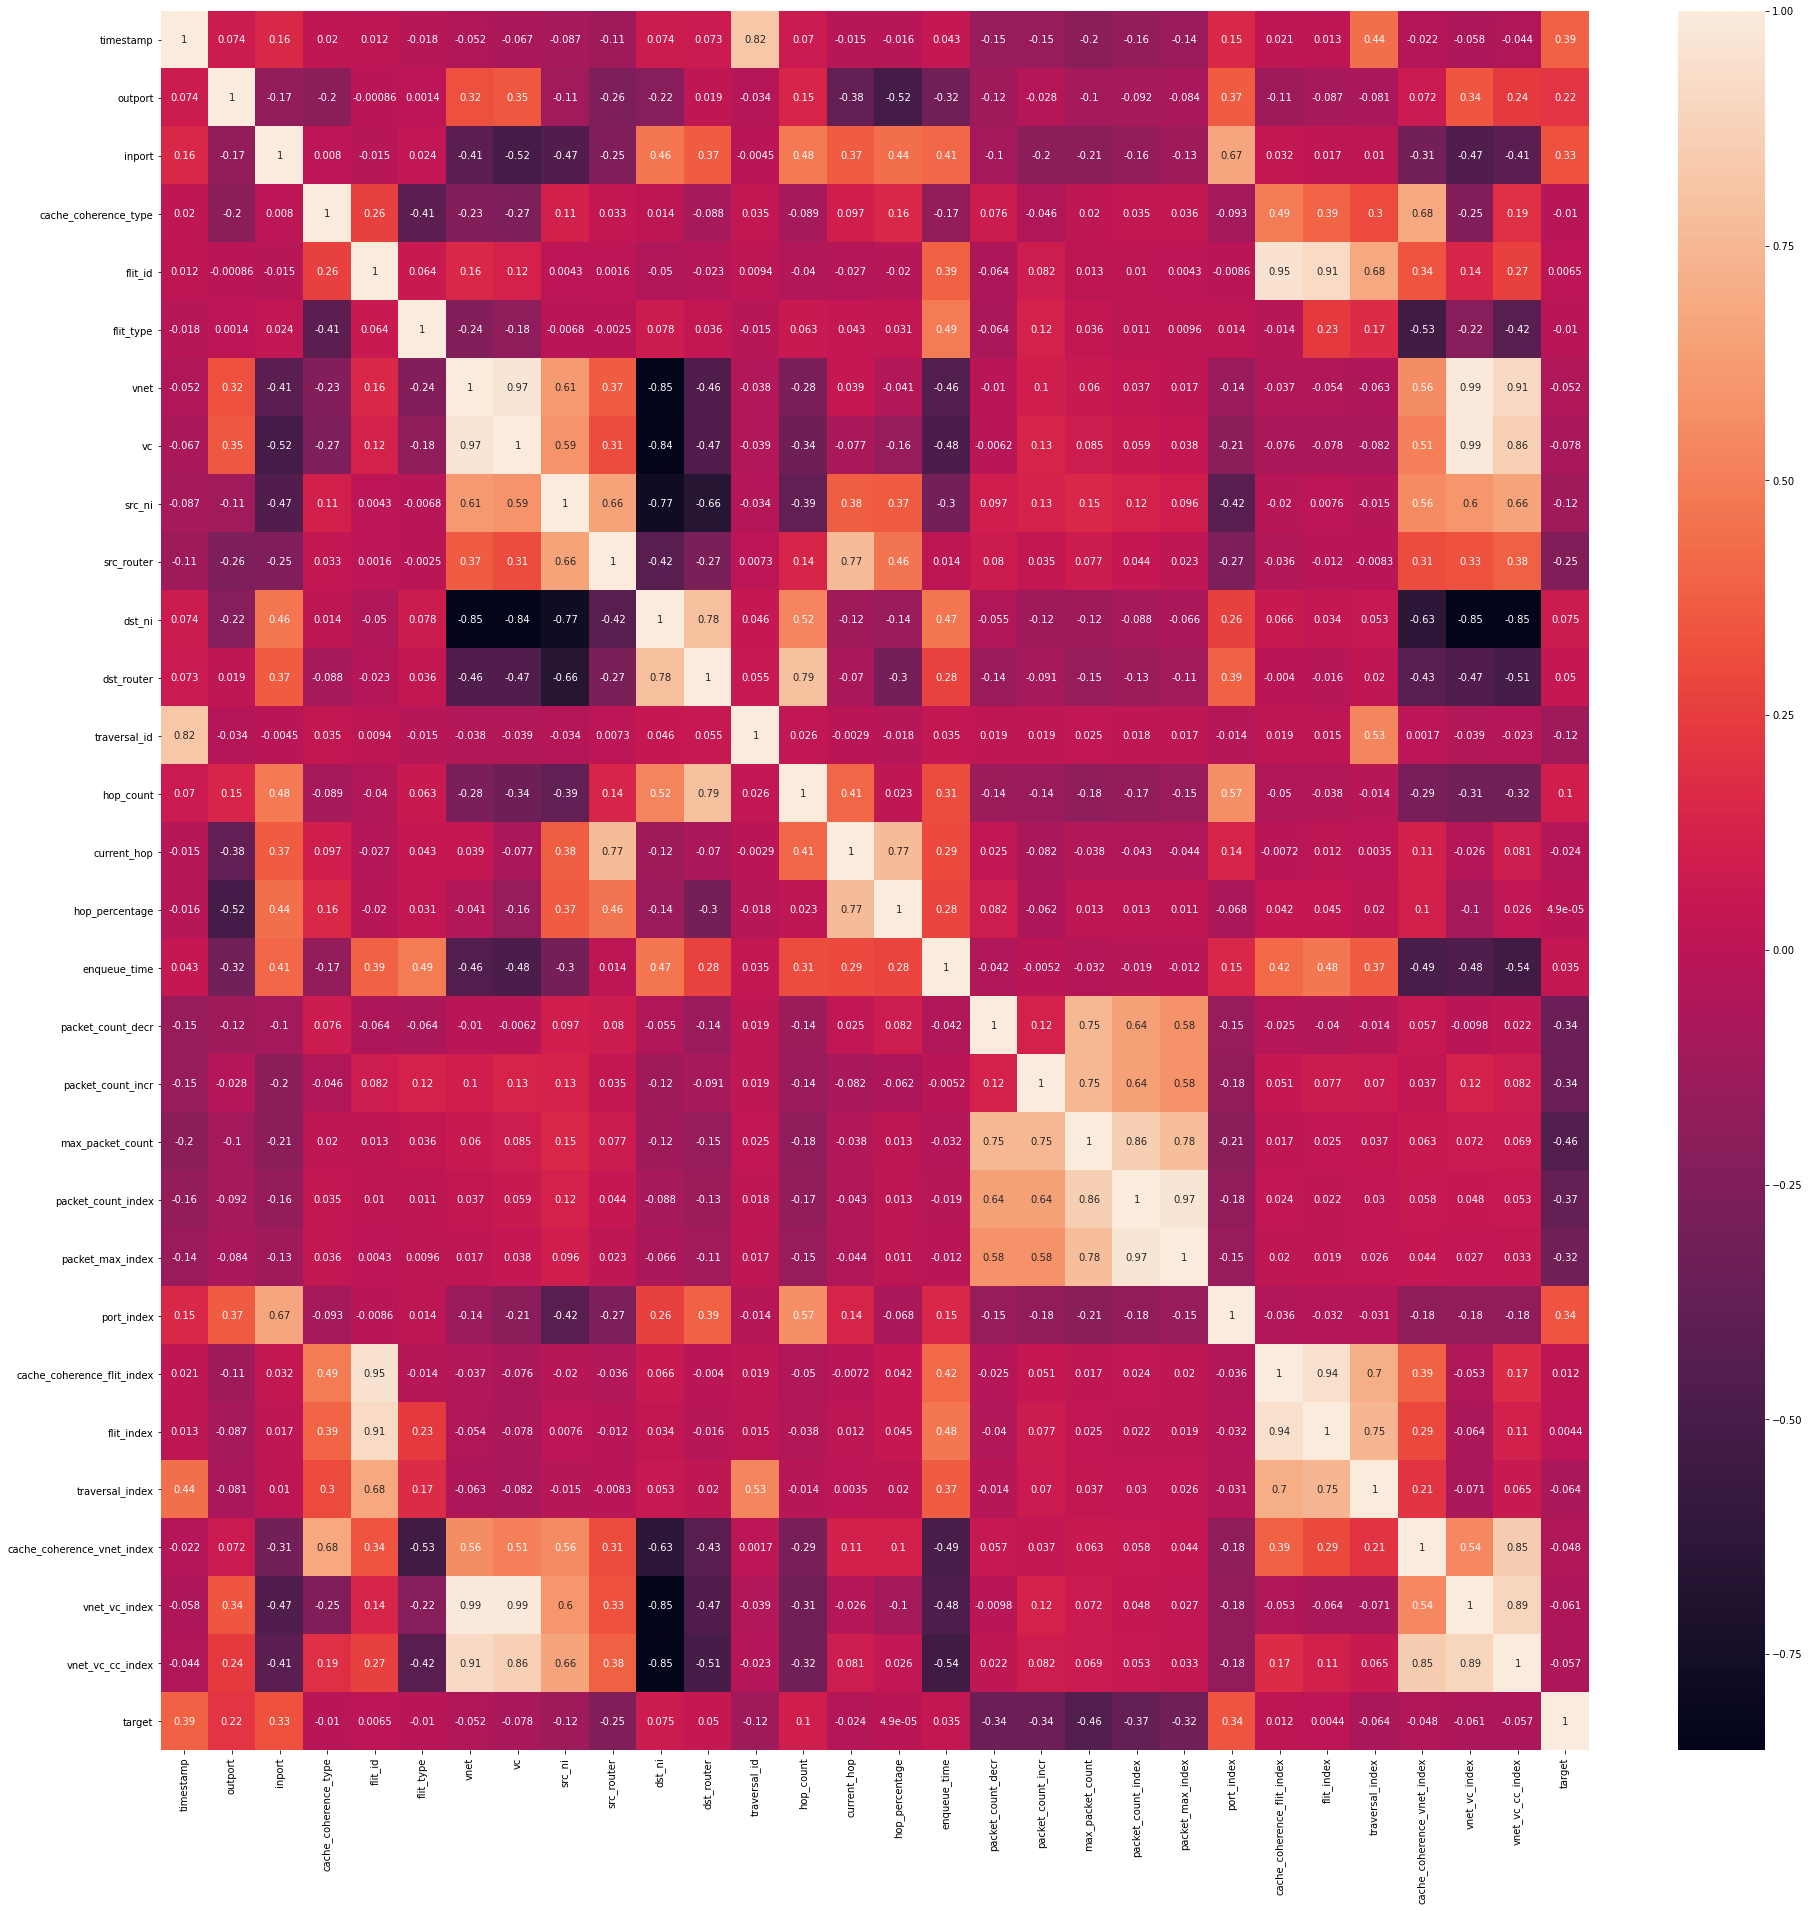

In [0]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,23,7,1,3,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9
1,2,4,1,1,4,3,9,23,7,0,4,1,0.250000,8,6,2,7,12,84,8,1,4,0,3,27,9
2,2,4,1,1,4,3,9,23,7,0,4,1,0.250000,8,6,1,6,6,36,8,1,4,0,3,27,9
3,0,2,4,1,1,5,17,1,1,1,1,1,1.000000,9,5,3,7,15,105,0,4,4,4,20,85,100
4,0,2,4,2,2,5,17,1,1,1,1,1,1.000000,10,4,4,7,16,112,0,8,16,16,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121922,2,4,5,2,2,3,9,22,6,10024,3,1,0.333333,15,5,8,12,40,480,8,10,20,200480,15,27,45
121923,2,4,5,3,2,3,9,22,6,10024,3,1,0.333333,22,4,9,12,36,432,8,15,30,300720,15,27,45
121924,2,4,5,4,2,3,9,22,6,10024,3,1,0.333333,29,3,10,12,30,360,8,20,40,400960,15,27,45
121925,2,4,5,5,3,3,9,22,6,10024,3,1,0.333333,36,2,11,12,22,264,8,25,75,751800,15,27,45


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000090,0.500000,0.0,0.000000,0.000000,0.200000,0.000000,0.200000,0.023529,0.006049,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.033333,0.200000,0.043137,0.010460,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.000000,0.166667,0.019608,0.004411,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.032258,0.066667,0.000090,0.166667,0.2,1.000000,0.090909,0.133333,0.066667,0.200000,0.054902,0.013106,0.0,0.103448,0.000000,0.000004,0.944444,0.794521,1.000000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.032258,0.066667,0.000090,0.166667,0.2,1.000000,0.109091,0.100000,0.100000,0.200000,0.058824,0.013989,0.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121922,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,0.500000,0.2,0.333333,0.200000,0.133333,0.233333,0.366667,0.152941,0.060365,1.0,0.310345,0.186047,0.201116,0.666667,0.000000,0.395604
121923,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,0.500000,0.2,0.333333,0.327273,0.100000,0.266667,0.366667,0.137255,0.054316,1.0,0.482759,0.302326,0.301673,0.666667,0.000000,0.395604
121924,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,0.500000,0.2,0.333333,0.454545,0.066667,0.300000,0.366667,0.113725,0.045243,1.0,0.655172,0.418605,0.402231,0.666667,0.000000,0.395604
121925,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.709677,0.400000,0.904693,0.500000,0.2,0.333333,0.581818,0.033333,0.333333,0.366667,0.082353,0.033144,1.0,0.827586,0.825581,0.754183,0.666667,0.000000,0.395604


In [0]:
train_X[train_X.duplicated()].shape

(167, 26)

In [0]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.171119,-0.202188,-0.000865,0.001351,0.322170,0.353278,-0.221121,0.019078,-0.034487,0.145547,-0.377938,-0.517540,-0.321506,-0.122129,-0.027728,-0.100042,-0.091971,-0.083934,0.368480,-0.114477,-0.086761,-0.080926,0.071657,0.341552,0.239070,0.217501
inport,-0.171119,1.000000,0.008017,-0.015209,0.023925,-0.413356,-0.519208,0.464556,0.368686,-0.004520,0.484100,0.368633,0.435780,0.411042,-0.103053,-0.204818,-0.205529,-0.160758,-0.127476,0.673311,0.032316,0.016819,0.009985,-0.306345,-0.467261,-0.413863,0.327344
cache_coherence_type,-0.202188,0.008017,1.000000,0.260562,-0.409243,-0.233227,-0.266014,0.013882,-0.087884,0.035405,-0.088939,0.097131,0.158701,-0.166384,0.075640,-0.045886,0.019863,0.035151,0.035747,-0.092814,0.489558,0.392216,0.300601,0.676150,-0.247846,0.190683,-0.010206
flit_id,-0.000865,-0.015209,0.260562,1.000000,0.063696,0.155681,0.117462,-0.049723,-0.022640,0.009405,-0.039907,-0.027402,-0.020023,0.389742,-0.063659,0.082483,0.012566,0.010093,0.004288,-0.008584,0.949958,0.913949,0.677395,0.340175,0.140310,0.268191,0.006547
flit_type,0.001351,0.023925,-0.409243,0.063696,1.000000,-0.244485,-0.184454,0.078050,0.035500,-0.014839,0.062634,0.043069,0.031480,0.489361,-0.064051,0.118056,0.036053,0.010866,0.009579,0.013506,-0.014094,0.233982,0.172082,-0.534261,-0.220341,-0.421193,-0.010253
vnet,0.322170,-0.413356,-0.233227,0.155681,-0.244485,1.000000,0.968483,-0.850452,-0.463853,-0.037635,-0.277168,0.039470,-0.041297,-0.460537,-0.010013,0.100565,0.060451,0.037216,0.017214,-0.137135,-0.037147,-0.054394,-0.062876,0.558749,0.990729,0.910107,-0.051955
vc,0.353278,-0.519208,-0.266014,0.117462,-0.184454,0.968483,1.000000,-0.840442,-0.466034,-0.038959,-0.337398,-0.076661,-0.155768,-0.477672,-0.006199,0.133547,0.085016,0.059334,0.037661,-0.212537,-0.075539,-0.078006,-0.081884,0.506907,0.992270,0.864320,-0.078365
dst_ni,-0.221121,0.464556,0.013882,-0.049723,0.078050,-0.850452,-0.840442,1.000000,0.784941,0.045991,0.524914,-0.115668,-0.136350,0.471431,-0.055317,-0.123252,-0.119209,-0.088137,-0.066243,0.264854,0.066338,0.034091,0.053024,-0.632513,-0.849777,-0.852608,0.075220
dst_router,0.019078,0.368686,-0.087884,-0.022640,0.035500,-0.463853,-0.466034,0.784941,1.000000,0.055159,0.790988,-0.070093,-0.297352,0.276257,-0.138316,-0.091156,-0.153191,-0.132340,-0.114211,0.387717,-0.003995,-0.015700,0.020286,-0.426394,-0.467024,-0.505705,0.049767
traversal_id,-0.034487,-0.004520,0.035405,0.009405,-0.014839,-0.037635,-0.038959,0.045991,0.055159,1.000000,0.025993,-0.002860,-0.018325,0.035338,0.018768,0.018897,0.025145,0.018241,0.017118,-0.014384,0.019203,0.014768,0.531640,0.001681,-0.038816,-0.022906,-0.120309


Principal Component Analysis

In [0]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.64894488, -0.58167798,  1.12720849, ..., -0.42048508,
         0.2037091 ,  0.14312388],
       [-1.17985237, -1.04458142,  0.19417825, ..., -0.2612297 ,
         0.32731373, -0.12405735],
       [-1.18208239, -1.04899514,  0.18991562, ..., -0.29148007,
         0.29306108, -0.12575219],
       ...,
       [-0.83019465, -0.0718037 , -0.79523449, ...,  0.52680074,
        -0.05996826, -0.19769899],
       [-0.86311132,  0.24090666, -1.13666379, ...,  0.56018567,
        -0.14058299, -0.13975863],
       [-1.14783925, -0.88618297,  0.16332467, ...,  0.49353525,
        -0.10833544, -0.278676  ]])

In [0]:
pca.explained_variance_ratio_

array([0.35898442, 0.14709688, 0.13420395, 0.11533491, 0.06557082,
       0.04053465, 0.03417099, 0.03236276, 0.02455299])

Text(0, 0.5, 'Variance')

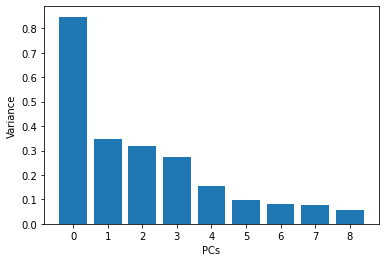

In [0]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [0]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.648945,-0.581678,1.127208,0.504565,0.615123,-0.103176,-0.420485,0.203709,0.143124
1,-1.179852,-1.044581,0.194178,-0.257829,0.678856,0.041939,-0.261230,0.327314,-0.124057
2,-1.182082,-1.048995,0.189916,-0.260239,0.675118,0.039748,-0.291480,0.293061,-0.125752
3,1.074696,0.090882,0.340148,-1.083700,-0.207006,-0.270496,-0.382658,0.258443,-0.119409
4,1.058472,0.261353,0.149799,-0.912602,0.070492,-0.223968,-0.406446,0.255473,-0.071182
...,...,...,...,...,...,...,...,...,...
121922,-0.828951,-0.451888,-0.327994,-0.183684,-0.267633,0.097103,0.558432,-0.054646,-0.135260
121923,-0.829513,-0.261684,-0.561458,-0.031766,-0.191972,0.068066,0.543729,-0.056037,-0.166464
121924,-0.830195,-0.071804,-0.795234,0.120047,-0.116435,0.038780,0.526801,-0.059968,-0.197699
121925,-0.863111,0.240907,-1.136664,0.398320,0.230708,0.085350,0.560186,-0.140583,-0.139759


In [0]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,-1.864513e-15,-1.456487e-15,4.555182e-16,-1.990700e-16,2.832525e-16,4.440881e-16,7.076771e-16,-1.543752e-15,-0.128650
1,-1.864513e-15,1.000000e+00,3.350930e-16,-1.200178e-15,2.746793e-16,-3.506849e-17,-2.477423e-16,-5.009203e-17,7.932553e-16,-0.229395
2,-1.456487e-15,3.350930e-16,1.000000e+00,-2.041391e-16,-3.898314e-16,4.882922e-16,-1.835045e-16,-5.432693e-17,-8.242890e-16,-0.265397
3,4.555182e-16,-1.200178e-15,-2.041391e-16,1.000000e+00,2.135570e-16,3.920200e-16,4.077598e-16,2.255656e-16,-1.604025e-15,-0.090684
4,-1.990700e-16,2.746793e-16,-3.898314e-16,2.135570e-16,1.000000e+00,-4.076699e-16,-2.208132e-16,3.603058e-17,-1.840452e-16,-0.022073
5,2.832525e-16,-3.506849e-17,4.882922e-16,3.920200e-16,-4.076699e-16,1.000000e+00,2.349828e-16,5.000133e-18,7.060489e-17,0.176355
6,4.440881e-16,-2.477423e-16,-1.835045e-16,4.077598e-16,-2.208132e-16,2.349828e-16,1.000000e+00,9.219485e-16,8.026048e-16,-0.306005
7,7.076771e-16,-5.009203e-17,-5.432693e-17,2.255656e-16,3.603058e-17,5.000133e-18,9.219485e-16,1.000000e+00,-3.297494e-17,-0.218864
8,-1.543752e-15,7.932553e-16,-8.242890e-16,-1.604025e-15,-1.840452e-16,7.060489e-17,8.026048e-16,-3.297494e-17,1.000000e+00,-0.116594
target,-1.286499e-01,-2.293948e-01,-2.653973e-01,-9.068444e-02,-2.207301e-02,1.763549e-01,-3.060055e-01,-2.188644e-01,-1.165937e-01,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

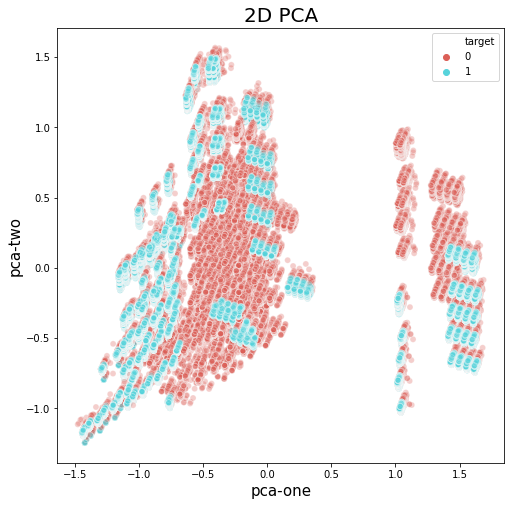

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

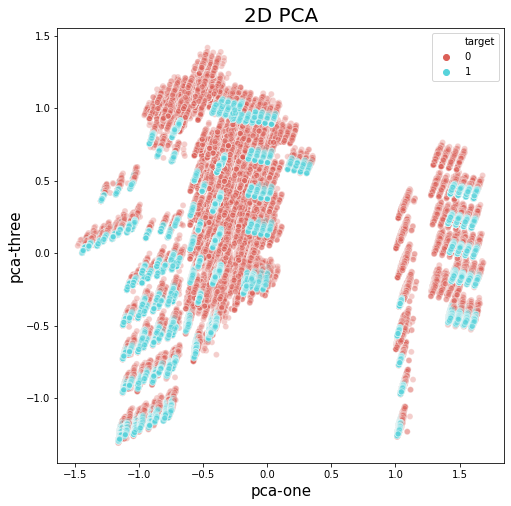

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

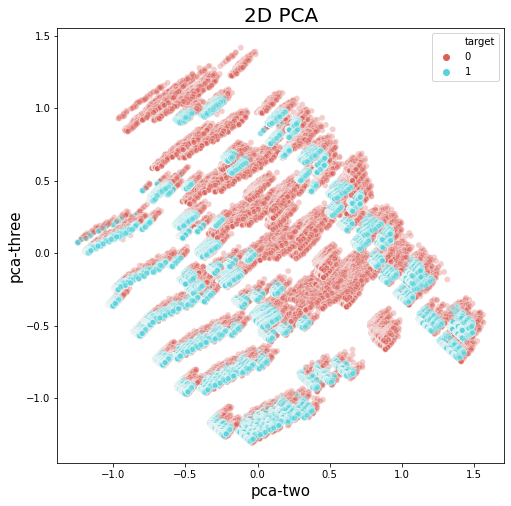

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

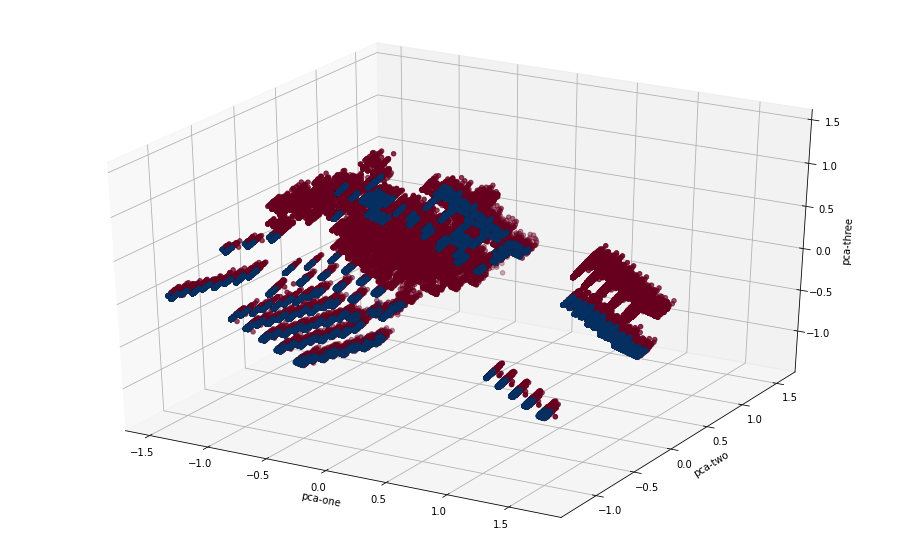

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

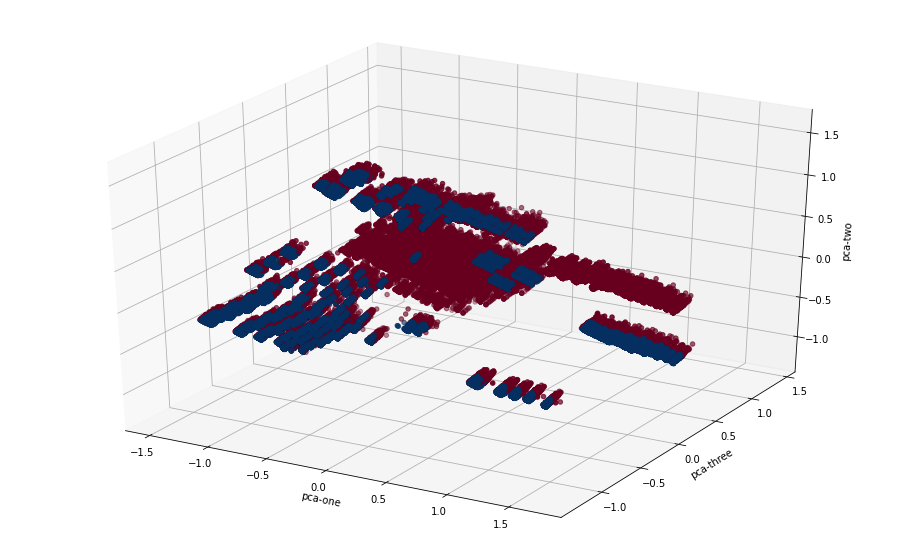

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

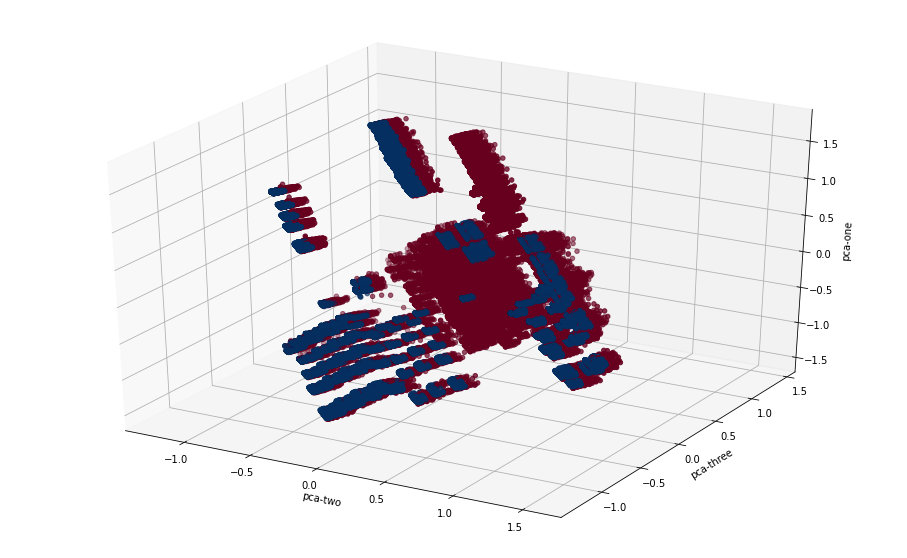

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 549.2652952671051 seconds


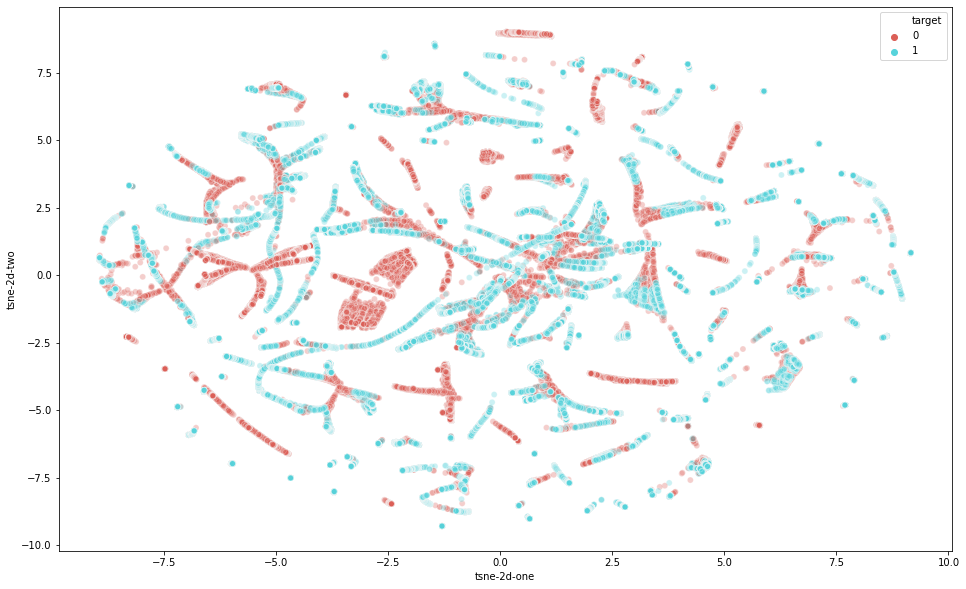

In [0]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

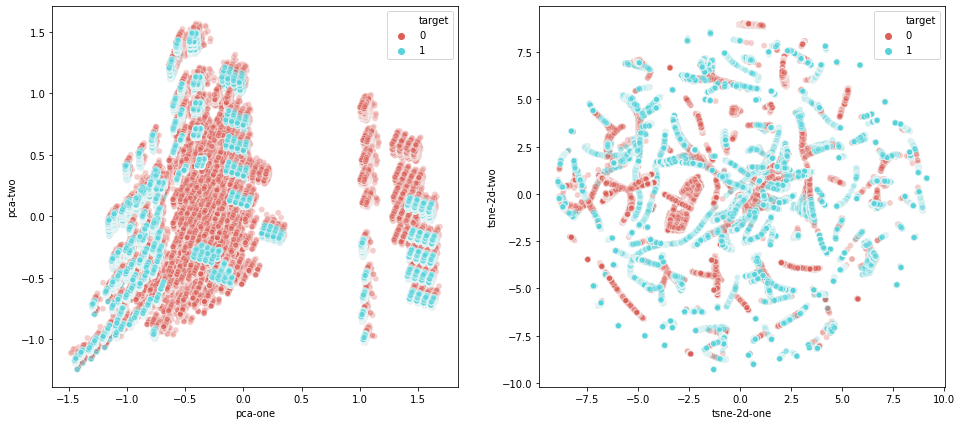

In [0]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 449.93573236465454 seconds


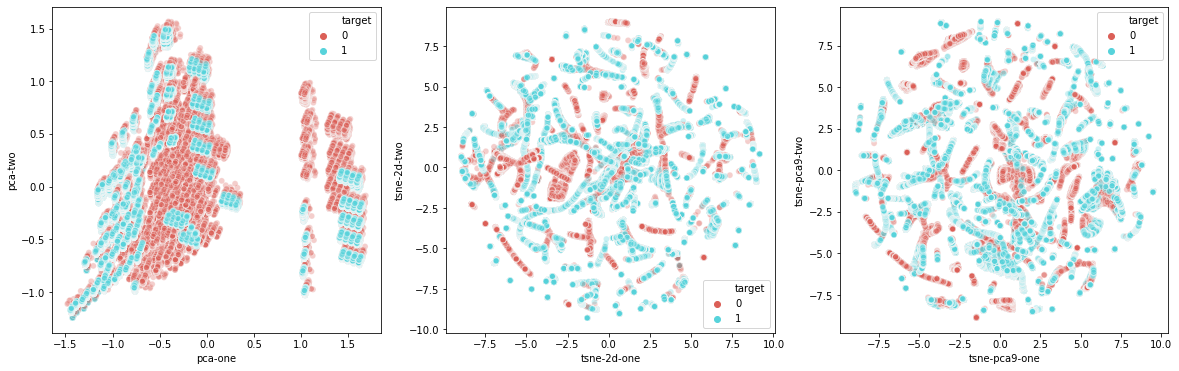

In [0]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    71826
1    50101
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
19          port_index  7017.092546
16    max_packet_count  4393.967826
1               inport  4105.160582
14   packet_count_decr  2202.456343
15   packet_count_incr  2191.516857
17  packet_count_index  2183.308289
0              outport  1715.431277
18    packet_max_index  1514.481135
6                   vc   257.290771
9         traversal_id   217.085244
24       vnet_vc_index   184.368527
10           hop_count   179.517812
5                 vnet   171.406556
7               dst_ni   146.439675
8           dst_router    97.809212
22     traversal_index    67.815081
25    vnet_vc_cc_index    58.040118


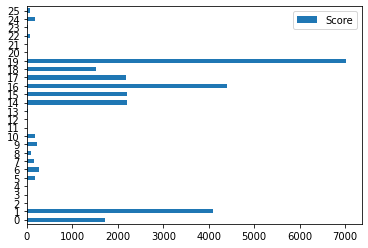

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.443209
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.346      
Dependent Variable:         target                  AIC:                     108124.2640
Date:                       2020-05-08 09:15        BIC:                     108347.6211
No. Observations:           121927                  Log-Likelihood:          -54039.    
Df Model:                   22                      LL-Null:                 -82567.    
Df Residuals:               121904                  LLR p-value:             0.0000     
Converged:                  0.0000                  Scale:                   1.0000     
No. Iterations:             35.0000                                                     
----------------------------------------------------------------------------------------
                            Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
----------------------------------------------------------

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 80.48205370049519
Test Prediction  80.57081932256213


In [60]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
24,vnet_vc_index,11.441037
7,dst_ni,10.679822
17,packet_count_index,8.360187
20,cache_coherence_flit_index,6.347908
4,flit_type,4.598006
1,inport,3.754142
23,cache_coherence_vnet_index,2.772719
0,outport,2.732643
2,cache_coherence_type,2.713176
13,enqueue_time,1.959918


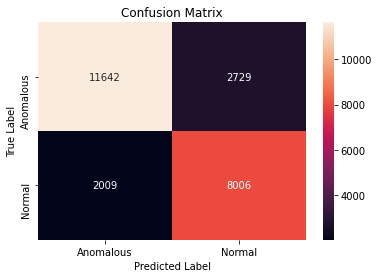

In [61]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     14371
           1       0.75      0.80      0.77     10015

    accuracy                           0.81     24386
   macro avg       0.80      0.80      0.80     24386
weighted avg       0.81      0.81      0.81     24386



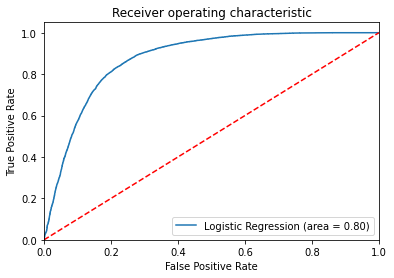

In [63]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [64]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [66]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.78233768364072
Test Prediction  87.33289592389075


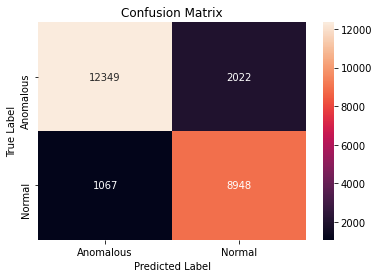

In [67]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     14371
           1       0.82      0.89      0.85     10015

    accuracy                           0.87     24386
   macro avg       0.87      0.88      0.87     24386
weighted avg       0.88      0.87      0.87     24386



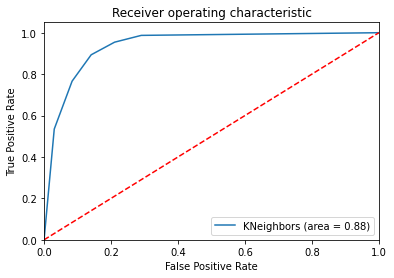

In [69]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [71]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [73]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 71.13931577490492
Test Prediction Score 71.40572459607972


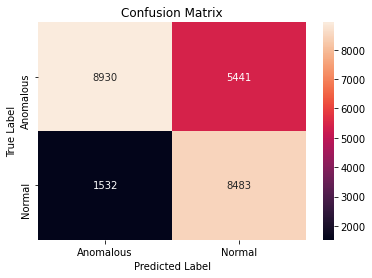

In [74]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [75]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72     14371
           1       0.61      0.85      0.71     10015

    accuracy                           0.71     24386
   macro avg       0.73      0.73      0.71     24386
weighted avg       0.75      0.71      0.71     24386



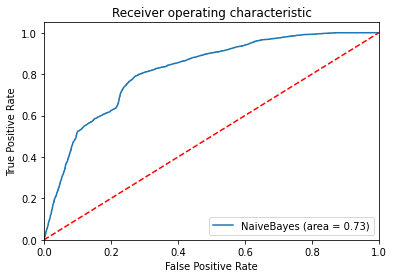

In [76]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [78]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 78032 samples, validate on 19509 samples
Epoch 1/10
78032/78032 [==============================] - 3s 36us/step - loss: 0.1771 - accuracy: 0.7379 - val_loss: 0.1494 - val_accuracy: 0.7969
Epoch 2/10
78032/78032 [==============================] - 3s 33us/step - loss: 0.1499 - accuracy: 0.7959 - val_loss: 0.1478 - val_accuracy: 0.7947
Epoch 3/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1487 - accuracy: 0.7949 - val_loss: 0.1468 - val_accuracy: 0.7933
Epoch 4/10
78032/78032 [==============================] - 3s 35us/step - loss: 0.1480 - accuracy: 0.7953 - val_loss: 0.1465 - val_accuracy: 0.7925
Epoch 5/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1475 - accuracy: 0.7961 - val_loss: 0.1457 - val_accuracy: 0.7954
Epoch 6/10
78032/78032 [==============================] - 3s 34us/step - loss: 0.1472 - accuracy: 0.7961 - val_loss: 0.1453 - val_accuracy: 0.7953
Epoch 7/10
78032/78032 [==============================] - 3s 34us/st

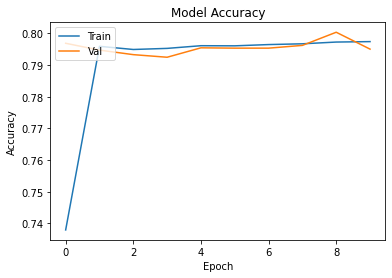

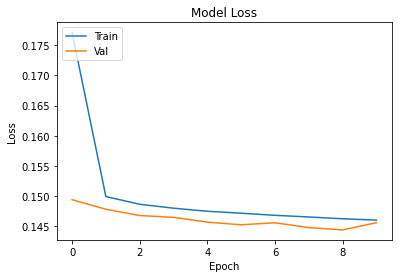

In [79]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [80]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.74%


3-Layer Neural Network

In [83]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 78032 samples, validate on 19509 samples
Epoch 1/15
78032/78032 [==============================] - 3s 36us/step - loss: 0.2441 - accuracy: 0.5793 - val_loss: 0.2424 - val_accuracy: 0.5886
Epoch 2/15
78032/78032 [==============================] - 3s 34us/step - loss: 0.2422 - accuracy: 0.5891 - val_loss: 0.2421 - val_accuracy: 0.5886
Epoch 3/15
78032/78032 [==============================] - 3s 33us/step - loss: 0.2420 - accuracy: 0.5891 - val_loss: 0.2419 - val_accuracy: 0.5886
Epoch 4/15
78032/78032 [==============================] - 3s 36us/step - loss: 0.2416 - accuracy: 0.5891 - val_loss: 0.2413 - val_accuracy: 0.5886
Epoch 5/15
78032/78032 [==============================] - 3s 34us/step - loss: 0.2393 - accuracy: 0.5892 - val_loss: 0.2345 - val_accuracy: 0.6008
Epoch 6/15
78032/78032 [==============================] - 3s 33us/step - loss: 0.2210 - accuracy: 0.6545 - val_loss: 0.2067 - val_accuracy: 0.6940
Epoch 7/15
78032/78032 [==============================] - 3s 33us/st

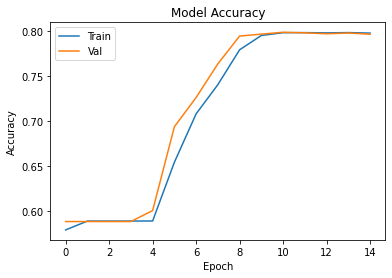

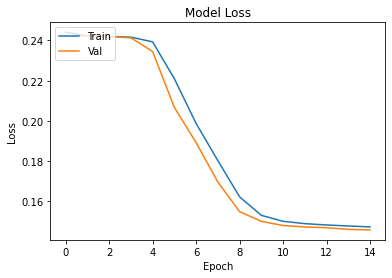

In [84]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [85]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.00%


4-Layer Neural Network



In [86]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 78032 samples, validate on 19509 samples
Epoch 1/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2434 - accuracy: 0.5891 - val_loss: 0.2420 - val_accuracy: 0.5886
Epoch 2/30
78032/78032 [==============================] - 3s 34us/step - loss: 0.2418 - accuracy: 0.5891 - val_loss: 0.2417 - val_accuracy: 0.5886
Epoch 3/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2414 - accuracy: 0.5891 - val_loss: 0.2411 - val_accuracy: 0.5886
Epoch 4/30
78032/78032 [==============================] - 3s 36us/step - loss: 0.2406 - accuracy: 0.5891 - val_loss: 0.2401 - val_accuracy: 0.5886
Epoch 5/30
78032/78032 [==============================] - 3s 35us/step - loss: 0.2389 - accuracy: 0.5891 - val_loss: 0.2370 - val_accuracy: 0.5886
Epoch 6/30
78032/78032 [==============================] - 3s 36us/step - loss: 0.2294 - accuracy: 0.5891 - val_loss: 0.2139 - val_accuracy: 0.5886
Epoch 7/30
78032/78032 [==============================] - 3s 36us/st

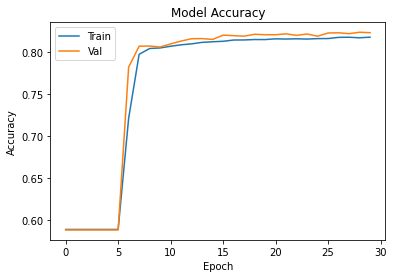

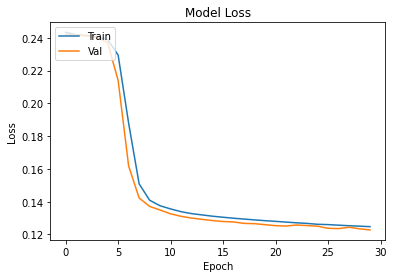

In [87]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [88]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.11%


5-Layer Neural Network Optimized

In [98]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 78032 samples, validate on 19509 samples
Epoch 1/100
78032/78032 [==============================] - 6s 73us/step - loss: 0.1303 - accuracy: 0.8096 - val_loss: 0.1168 - val_accuracy: 0.8288
Epoch 2/100
78032/78032 [==============================] - 5s 65us/step - loss: 0.1194 - accuracy: 0.8248 - val_loss: 0.1115 - val_accuracy: 0.8355
Epoch 3/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1165 - accuracy: 0.8298 - val_loss: 0.1082 - val_accuracy: 0.8383
Epoch 4/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1142 - accuracy: 0.8348 - val_loss: 0.1059 - val_accuracy: 0.8468
Epoch 5/100
78032/78032 [==============================] - 5s 63us/step - loss: 0.1131 - accuracy: 0.8362 - val_loss: 0.1156 - val_accuracy: 0.8279
Epoch 6/100
78032/78032 [==============================] - 5s 64us/step - loss: 0.1120 - accuracy: 0.8384 - val_loss: 0.1041 - val_accuracy: 0.8495
Epoch 7/100
78032/78032 [==============================] - 5s 

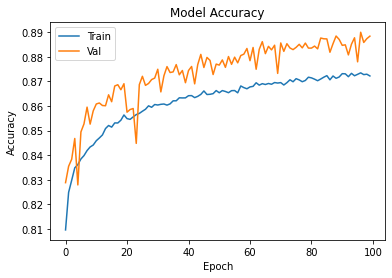

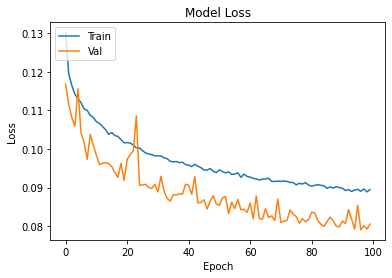

In [103]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [104]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.81%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.9315262089598747


In [115]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [117]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 99.13779846423554
Test Prediction Score 95.66144509144591


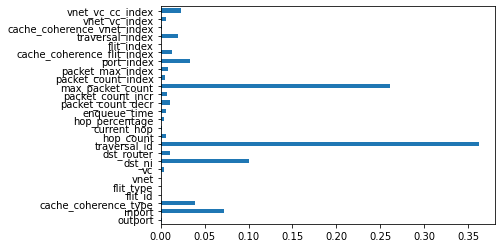

In [118]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

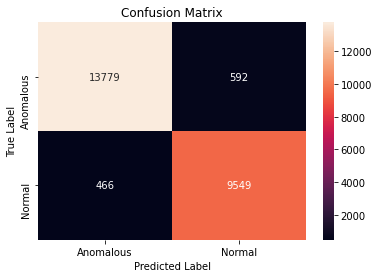

In [119]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [120]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14371
           1       0.94      0.95      0.95     10015

    accuracy                           0.96     24386
   macro avg       0.95      0.96      0.96     24386
weighted avg       0.96      0.96      0.96     24386



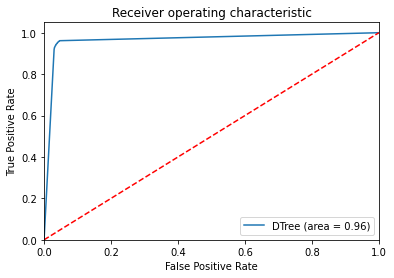

In [121]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [123]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [125]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.74267231215592
Test Prediction Score 95.88698433527433


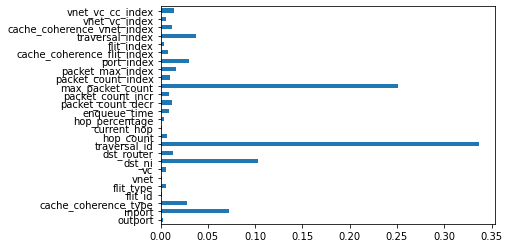

In [126]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

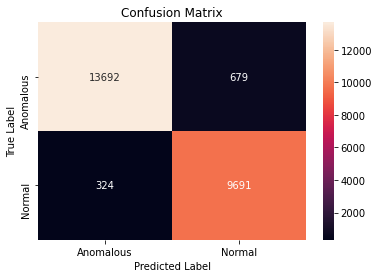

In [127]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [128]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     14371
           1       0.93      0.97      0.95     10015

    accuracy                           0.96     24386
   macro avg       0.96      0.96      0.96     24386
weighted avg       0.96      0.96      0.96     24386



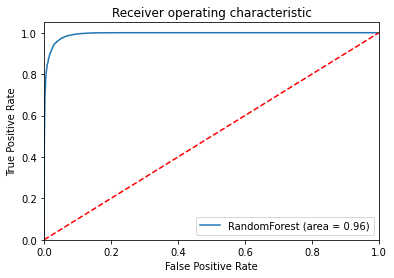

In [129]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [131]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [133]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.89440337909187
Test Prediction Score 97.86762896744034


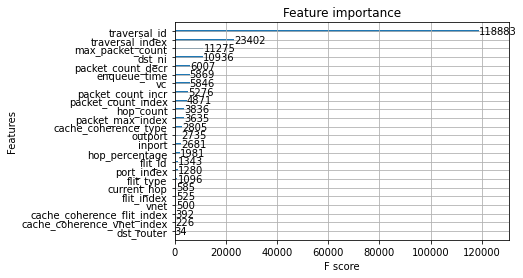

In [134]:
plot_importance(xgbc)
plt.show()

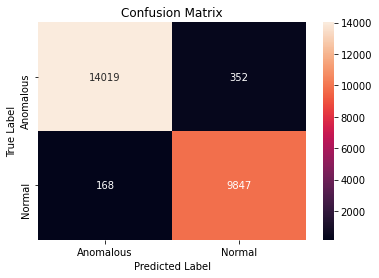

In [135]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [136]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14371
           1       0.97      0.98      0.97     10015

    accuracy                           0.98     24386
   macro avg       0.98      0.98      0.98     24386
weighted avg       0.98      0.98      0.98     24386



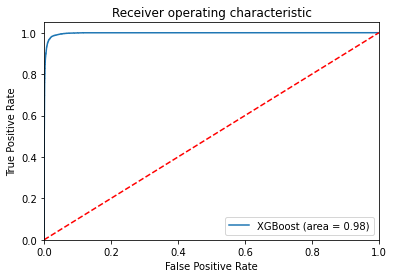

In [137]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

Best parameters: {'learning_rate': 0.2, 'n_estimators': 38}
Accuracy : 0.9121924746743849


In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 96.03232030873131
Test Prediction Score 93.42165957664908


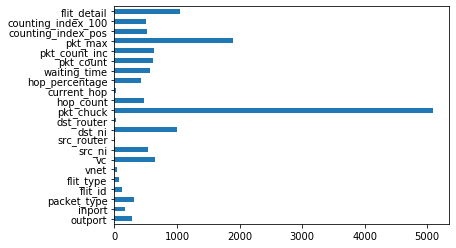

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

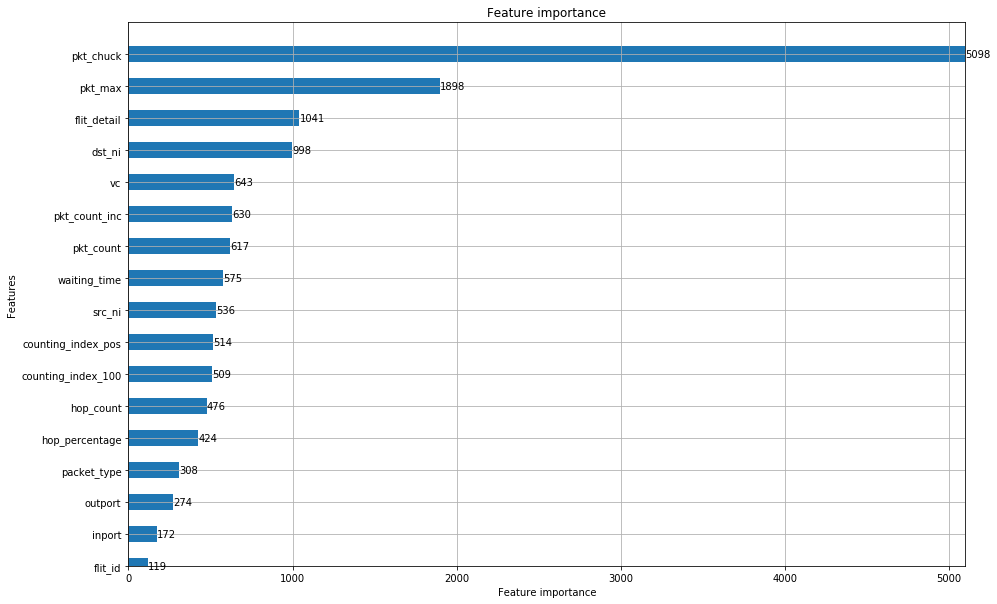

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5100), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[5098,
 1898,
 1041,
 998,
 643,
 630,
 617,
 575,
 536,
 514,
 509,
 476,
 424,
 308,
 274,
 172,
 119,
 68,
 44,
 23,
 20,
 13]

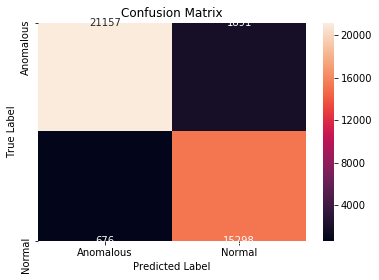

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     23048
           1       0.89      0.96      0.92     15974

    accuracy                           0.93     39022
   macro avg       0.93      0.94      0.93     39022
weighted avg       0.94      0.93      0.93     39022



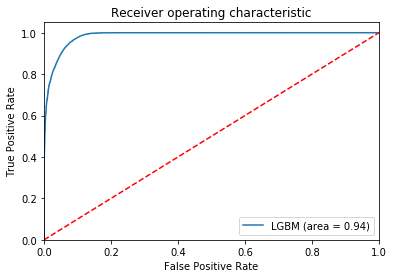

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()